In [37]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras import regularizers

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [38]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [39]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
#decoder = Model(encoded_input, x)

In [50]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [51]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [60]:
autoencoder.fit(x_train, x_train,
                epochs=300,
                batch_size=256,
                shuffle=True,
                validation_data=(x_train, x_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/300
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1008 - val_loss: 0.1006
Epoch 2/300
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1006 - val_loss: 0.1005
Epoch 3/300
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1005 - val_loss: 0.1003
Epoch 4/300
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1004 - val_loss: 0.1003
Epoch 5/300
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1002 - val_loss: 0.1001
Epoch 6/300
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1001 - val_loss: 0.0999
Epoch 7/300
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1000 - val_loss: 0.0999
Epoch 8/300
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0999 - val_loss: 0.0997
Epoch 9/300
60000/60000 [==============================] - 2s 26us/sample - loss: 0.09

Epoch 76/300
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0967 - val_loss: 0.0967
Epoch 77/300
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0967 - val_loss: 0.0966
Epoch 78/300
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0967 - val_loss: 0.0966
Epoch 79/300
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0966 - val_loss: 0.0965
Epoch 80/300
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0966 - val_loss: 0.0965
Epoch 81/300
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0966 - val_loss: 0.0965
Epoch 82/300
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0966 - val_loss: 0.0965
Epoch 83/300
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0966 - val_loss: 0.0964
Epoch 84/300
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0965 - val_loss: 0.0964
Epoch 85/300
60000/

60000/60000 [==============================] - 2s 27us/sample - loss: 0.0956 - val_loss: 0.0954
Epoch 151/300
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0955 - val_loss: 0.0954
Epoch 152/300
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0955 - val_loss: 0.0955
Epoch 153/300
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0955 - val_loss: 0.0954
Epoch 154/300
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0955 - val_loss: 0.0955
Epoch 155/300
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0955 - val_loss: 0.0955
Epoch 156/300
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0955 - val_loss: 0.0954
Epoch 157/300
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0955 - val_loss: 0.0954
Epoch 158/300
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0955 - val_loss: 0.0954
Epoch 159/300
60000/6000

60000/60000 [==============================] - 3s 46us/sample - loss: 0.0950 - val_loss: 0.0949
Epoch 225/300
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0949 - val_loss: 0.0949
Epoch 226/300
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0950 - val_loss: 0.0949
Epoch 227/300
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0949 - val_loss: 0.0948
Epoch 228/300
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0949 - val_loss: 0.0949
Epoch 229/300
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0949 - val_loss: 0.0949
Epoch 230/300
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0949 - val_loss: 0.0949
Epoch 231/300
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0949 - val_loss: 0.0948
Epoch 232/300
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0949 - val_loss: 0.0948
Epoch 233/300
60000/6000

60000/60000 [==============================] - 5s 82us/sample - loss: 0.0946 - val_loss: 0.0945
Epoch 299/300
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0946 - val_loss: 0.0945
Epoch 300/300
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0946 - val_loss: 0.0944


In [61]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

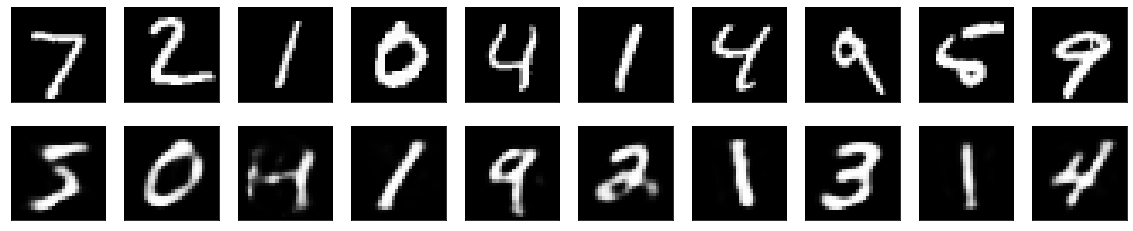

In [62]:
%matplotlib inline
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [63]:
print(encoded_imgs[0].shape)

(32,)


In [64]:
y_train[:].shape

(60000,)

In [65]:
x=encoder.predict(x_train)[:,0]#.shape
y=encoder.predict(x_train)[:,1]

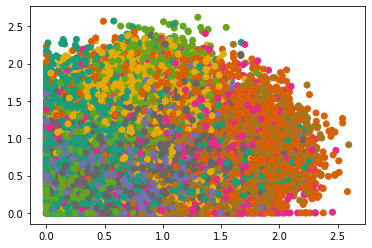

In [66]:
plt.scatter(x,y,c=y_train,cmap='Dark2')

In [67]:
x_train.shape

(60000, 784)

In [68]:
y_train.shape

(60000,)

5


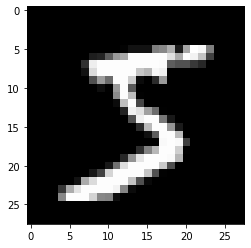

In [69]:
plt.imshow(x_train[0].reshape(28, 28))
print(y_train[0])